# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [12]:
data = pd.read_csv('weight-height.csv')
male_df =  data[data['Gender'] == 'Male']
female_df =  data[data['Gender'] == 'Female']
print('Male Height mean:', male_df['Height'].mean())
print('Male Height sd:', male_df['Height'].std())
print('Male Weight mean:', male_df['Weight'].mean())
print('Male Weight sd:', male_df['Weight'].std())
print('Female Height mean:', female_df['Height'].mean())
print('Female Height sd:', female_df['Height'].std())
print('Female Weight mean:', female_df['Weight'].mean())
print('Female Weight sd:', female_df['Weight'].std())
# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Male Height mean: 69.02634590621741
Male Height sd: 2.863362228660647
Male Weight mean: 187.0206206581932
Male Weight sd: 19.7811545167638
Female Height mean: 63.70877360342507
Female Height sd: 2.696284015765054
Female Weight mean: 135.86009300746835
Female Weight sd: 19.022467805319028


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

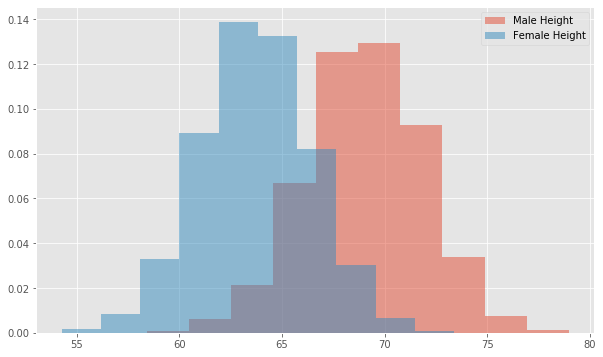

In [26]:
plt.figure(figsize=(10,6))
plt.hist(male_df['Height'], bins=10, alpha=0.5, label='Male Height', density=True)
plt.hist(female_df['Height'], bins=10, alpha=0.5, label='Female Height', density=True)
plt.legend()
plt.show()

The histogram shows that the average height of males is greater than the average height of females. This is a common observance in real life.

## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

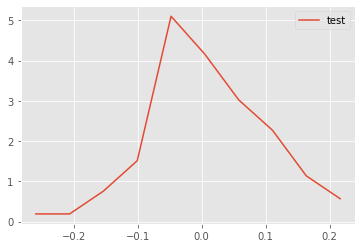

In [29]:
def density(x):
    
    n, bins = np.histogram(x, 10, density=1)
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k] + bins[k+1])
        pdfy[k] = n[k]
    return pdfx, pdfy

# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

## Add overlapping density plots to the histograms plotted earlier

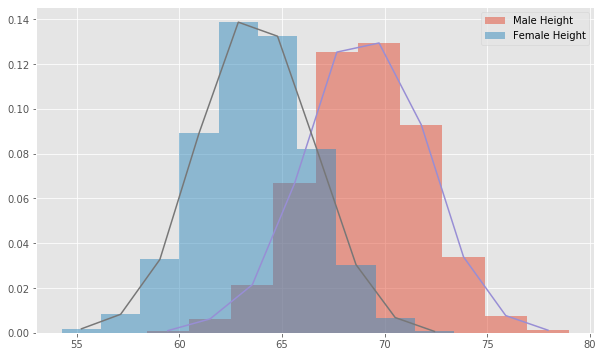

In [30]:
plt.figure(figsize=(10,6))
plt.hist(male_df['Height'], bins=10, alpha=0.5, label='Male Height', density=True)
plt.hist(female_df['Height'], bins=10, alpha=0.5, label='Female Height', density=True)
plt.legend()
x,y = density(male_df['Height'])
plt.plot(x,y)
x,y = density(female_df['Height'])
plt.plot(x,y)
plt.show()

## Repeat the above exercise for male and female weights

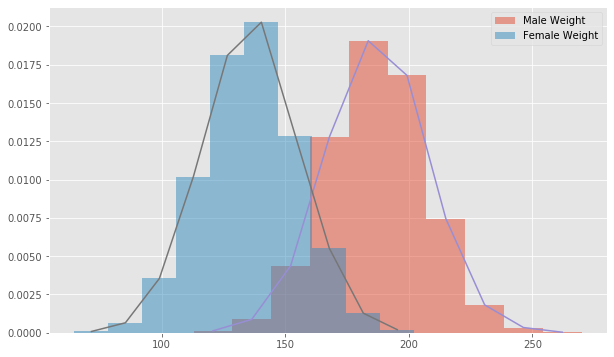

In [31]:
plt.figure(figsize=(10,6))
plt.hist(male_df['Weight'], bins=10, alpha=0.5, label='Male Weight', density=True)
plt.hist(female_df['Weight'], bins=10, alpha=0.5, label='Female Weight', density=True)
plt.legend()
x,y = density(male_df['Weight'])
plt.plot(x,y)
x,y = density(female_df['Weight'])
plt.plot(x,y)
plt.show()

## Write your observations in the cell below

The average male weight is greater than the average female weight. This corresponds with the height histogram as well, showing that on average males are taller and heavier than females.

## Repeat the above experiments in seaborn and compare with your results

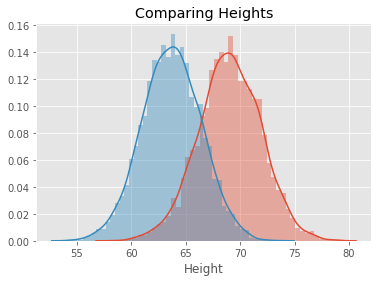

In [35]:
import seaborn as sns
sns.distplot(male_df['Height'])
sns.distplot(female_df['Height'])
plt.title('Comparing Heights')
plt.show()

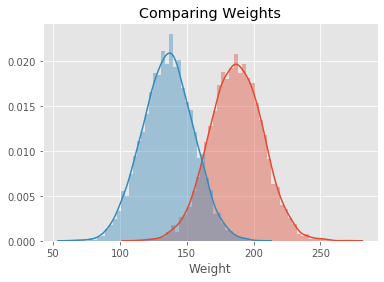

In [36]:
sns.distplot(male_df['Weight'])
sns.distplot(female_df['Weight'])
plt.title('Comparing Weights')
plt.show()

The seaborn distplot function allows for a quicker and simpler code than using numpy and matplotlib. The seaborn plots are also more accurate as the amount of bins in each plot are increased, but the overall findings are still the same.

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.